<h3>1. Introduction</h3>

<i>By Stephen Lin</i>

My goal is to perform some exploratory data analysis on the training dataset from Kaggle's Titanic:Machine Learning Through Disaster competition.  I'll do this by experimenting with some different descriptive statistics and graphs to provoke further study.

<h3>2. Set up</h3>

In [58]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set viz as inline
%matplotlib inline


<h3>3. Data cleaning/wrangling</h3>

In [59]:
# import data sets
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

df_train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df_train.info()
# df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


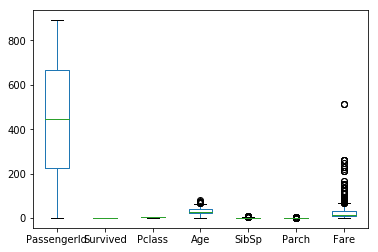

In [71]:
df_train.plot.box()

At first glance, it looks like Age and Fare might have some outliers to clean up.

Skipping data cleaning step for now in order to jump straight to the analysis. I suggest:
<ol>
    <li>populating missing ages</li>
    <li>removing unneeded columns like Name, Cabin, Ticket</li>
    <li>grouping certain features</li>

<h3>4. Data Analysis</h3>

<h4>4.1 Analyzing Gender</h4>

Taking a look at perhaps the first feature that may be meaningful for prediction later.  Breaking down passengers by Survived and Sex suggests that women were more likely to survive than men were.

Females had a  74.2 % chance of surviving
Males had a  18.89 % chance of surviving


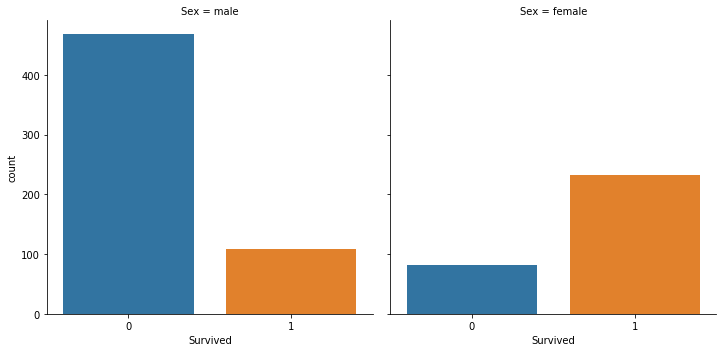

In [61]:
sns.catplot(x="Survived",col='Sex',kind='count',data=df_train);
print("Females had a ", round(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count(), 4)*100, "% chance of surviving");
print("Males had a ", round(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count(),4)*100, "% chance of surviving");

In [69]:
# df_train.groupby('Survived').Fare.hist(alpha=0.6);
# df_train.groupby('Survived').Age.hist(alpha=0.6);
# df_train.groupby('Survived').Age.plot(kind='bar', stacked=True);
# sns.catplot(y="Deck", hue="Pclass", kind="count", data=df_train);
# sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df_train);

<h4>4.2 Analyzing Class</h4>

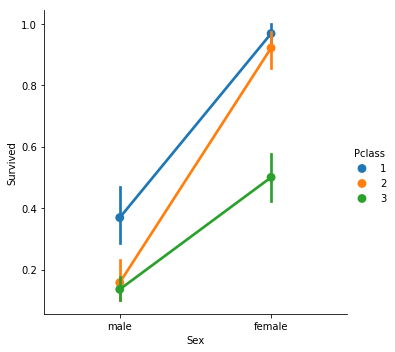

In [65]:
sns.catplot(x="Sex",y="Survived",hue="Pclass",kind="point",data=df_train);

The data seems to suggest that higher classes, especially female passengers in higher classes, had higher survival rates.

<h4>4.3 Analyzing Age</h4>

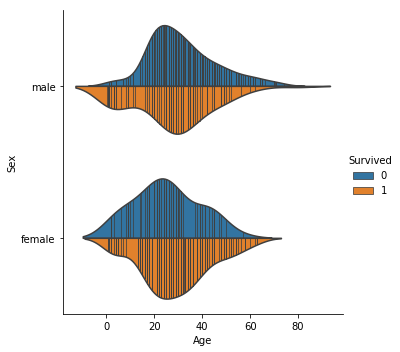

In [66]:
sns.catplot(x="Age",y="Sex",hue="Survived",kind="violin",inner="stick",split=True,data=df_train);

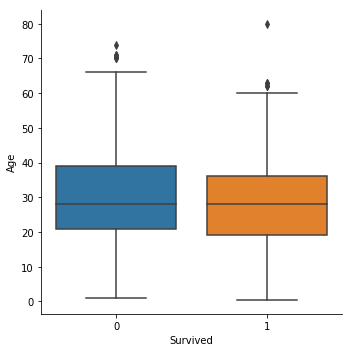

In [67]:
sns.catplot(x="Survived",y="Age",kind="box",data=df_train);

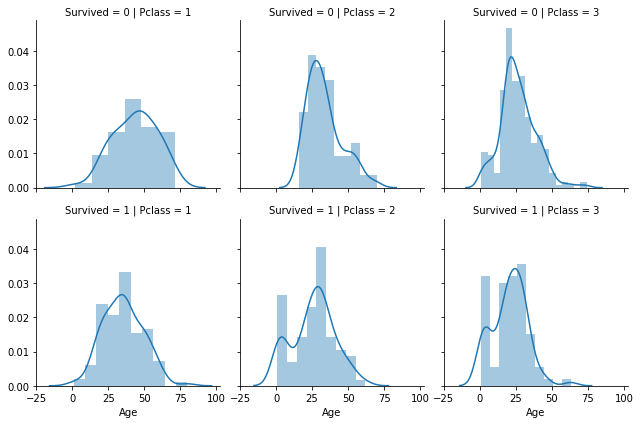

In [44]:
g = sns.FacetGrid(df_train, row="Survived",col="Pclass");
g.map(sns.distplot, "Age");
plt.show()

The data suggests that those who survived tended to be younger in age.

<h4>4.4 Analyzing Fare</h4>

In [68]:
df_train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


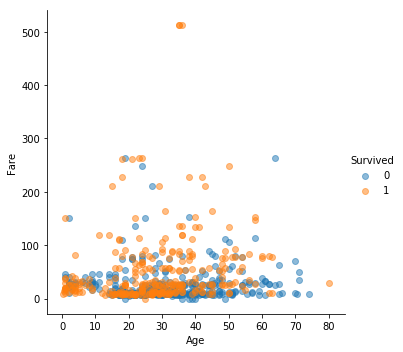

In [34]:
sns.lmplot(x="Age",y="Fare",hue="Survived", data=df_train, fit_reg=False, scatter_kws={'alpha':0.5})

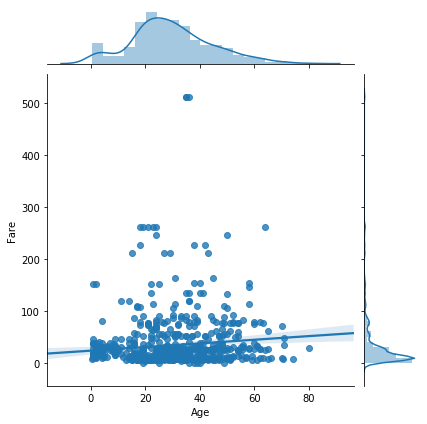

In [72]:
sns.jointplot(data=df_train, x="Age",y="Fare",kind="reg")

/Users/stephenlin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


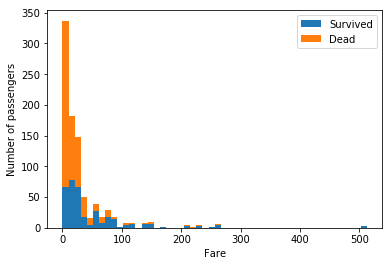

In [78]:
figure = plt.figure()
plt.hist([df_train[df_train['Survived']==1]['Fare'],df_train[df_train['Survived']==0]['Fare']], 
         stacked=True, 
         bins=50, 
         label=["Survived","Dead"])
plt.xlabel("Fare")
plt.ylabel("Number of passengers")
plt.legend();

Notes for self: need more practice for using groupby, stack, unstack to get the right combo of data
And continue improving at visualization

Add hypothesis testing for each feature, whether it impacts the chances for survival

H0= feature has no impact on survivability
H1= feature has impact on survivability

Run chi-square test for independence, and calculate p-values to 

<h3>5. Feature Engineering</h3>

To do: given the interesting correlations in the EDA, process and transform the variables into viable ones, and create new useful features.

<h3>6. Modeling</h3>

To do: Build statistical model to predict survivability of new passengers, given their information.